# Machine Learning Project- Employee Turnover Analytics
## Submitted by- Vivek Chitale

#### Problem scenario:
Portobello Tech is an app innovator who has devised an intelligent way of 
predicting employee turnover within the company. It periodically evaluates 
employees' work details, including the number of projects they worked on 
average monthly working hours, time spent in the company, promotions in the 
last five years, and salary le
Data from prior evaluations shows the employees’ satisfaction in the workplace. 
The data could be used to identify patterns in work style and their interest in
continuing to work for the company. 
The HR Department owns the data and uses it to predict employee turnove. 
Employee turnover refers to the total number of workers who leave a company 
over time.
As the ML Developer assigned to the HR Department, you have been asked to 
create ML programs to:
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and 
evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance. 
6. Identify the best model and justify the evaluation metrics used. 
7. Suggest various retention strategies for targeted employees.vel.

In [828]:
#Importing libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [830]:
#Importing the HR data csv file
df = pd.read_csv("HR_comma_sep.csv")

In [832]:
#Show data frame
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [834]:
#get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Observation- No missing values in the data

#### 1. Perform data quality checks by checking for missing values, if any.

In [838]:
#check the missing values (null data)
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Get Unique values

In [841]:
df["satisfaction_level"].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [843]:
df["last_evaluation"].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [845]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [847]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [849]:
df["time_spend_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [851]:
df["Work_accident"].unique()

array([0, 1], dtype=int64)

In [853]:
df["left"].unique()

array([1, 0], dtype=int64)

In [855]:
df["promotion_last_5years"].unique()

array([0, 1], dtype=int64)

In [857]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [859]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [861]:
#Get the correlation 
df.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### 2 Understand what factors contributed most to employee turnover at EDA.
####   2.1. Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

<Axes: >

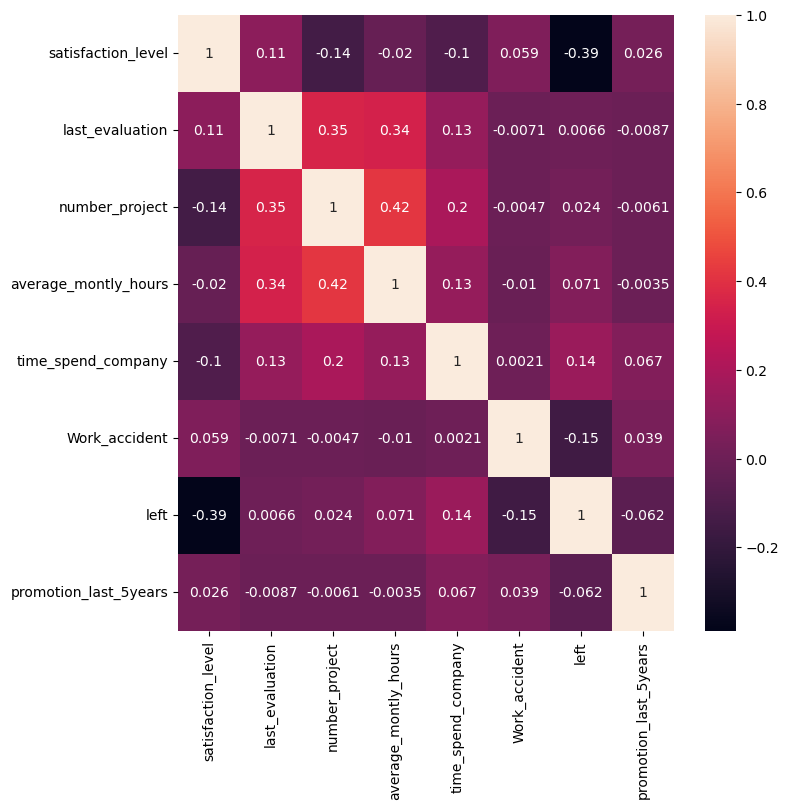

In [864]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [865]:
#create a data frame (df1) based on grouping sales and left count
df1= df.groupby(["sales"])["left"].value_counts().reset_index(name="count")
df1=pd.DataFrame(df1)

In [868]:
#get the total value count for each job/role type from column sales
df["sales"].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [870]:
dft=df["sales"].value_counts().reset_index(name="Total")

In [872]:
dft=dft.rename(columns={"index":"sales"})

In [874]:
dft

,sales,Total
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [876]:
# get the count for each role based on if they have left (1) or not (0)
dfmer=df1.merge(dft,how="left")

In [878]:
dfmer

,sales,left,count,Total
0,IT,0,954,1227
1,IT,1,273,1227
2,RandD,0,666,787
3,RandD,1,121,787
4,accounting,0,563,767
5,accounting,1,204,767
6,hr,0,524,739
7,hr,1,215,739
8,management,0,539,630
9,management,1,91,630


In [880]:
# Normalize the data by creating a new column 'normal' by dividing the count with total and multiply with 100 
dfmer["normal"]=dfmer["count"].div(dfmer["Total"].values)
dfmer["normal"]=dfmer["normal"]*100

In [882]:
dfmer

,sales,left,count,Total,normal
0,IT,0,954,1227,77.750611
1,IT,1,273,1227,22.249389
2,RandD,0,666,787,84.625159
3,RandD,1,121,787,15.374841
4,accounting,0,563,767,73.402868
5,accounting,1,204,767,26.597132
6,hr,0,524,739,70.906631
7,hr,1,215,739,29.093369
8,management,0,539,630,85.555556
9,management,1,91,630,14.444444


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

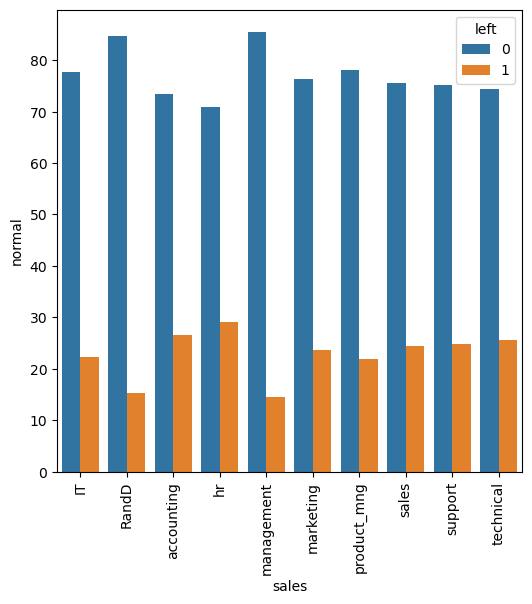

In [884]:
# draw a box plot based on the normalized data values
plt.figure(figsize=(6,6))
sns.barplot(x="sales",y='normal',hue="left",data=dfmer)
plt.xticks(rotation=90)

#### Observation- Employees from HR department are leaving the most based on normalized data (~29)
Normal = (Count of people from leaving category in a department)/(Total number of people in that department)*100

In [887]:
df1.head()

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

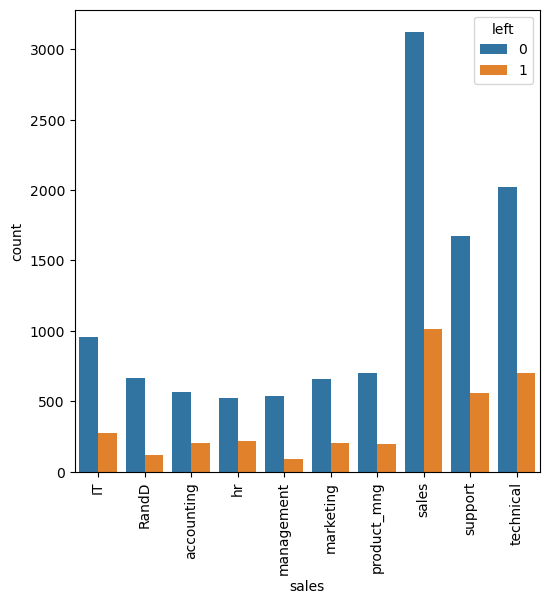

In [889]:
#sales
plt.figure(figsize=(6,6))
sns.barplot(x="sales",y='count',hue="left",data=df1)
plt.xticks(rotation=90)

#### Observation- Employees from 'Sales' department are leaving the most based on the count of leaving people.

In [892]:
#create a data frame (df2) based on grouping salary and left count
df2= df.groupby(["salary"])["left"].value_counts().reset_index(name="count")
df2=pd.DataFrame(df2)

In [894]:
df2.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


([0, 1, 2], [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

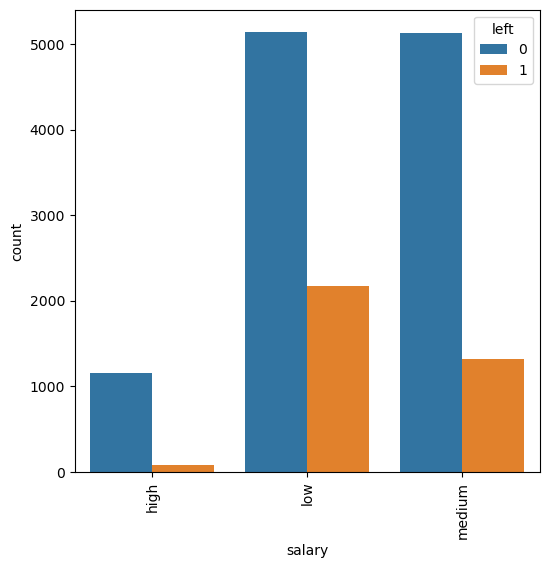

In [896]:
#salary
plt.figure(figsize=(6,6))
sns.barplot(x="salary",y='count',hue="left",data=df2)
plt.xticks(rotation=90)

#### Observation- Employees with lower salaries are leaving the most

In [899]:
#create a data frame (df3) based on grouping time spend in company and left count
df3= df.groupby(["time_spend_company"])["left"].value_counts().reset_index(name="count")
df3=pd.DataFrame(df3)

In [901]:
df3.head()

,time_spend_company,left,count
0,2,0,3191
1,2,1,53
2,3,0,4857
3,3,1,1586
4,4,0,1667


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10')])

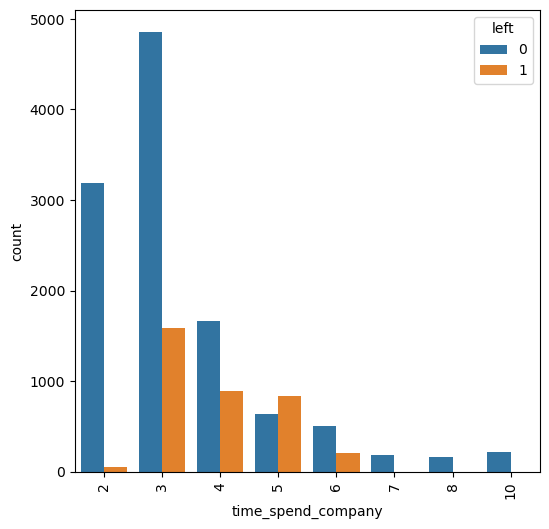

In [903]:
#time_spend_company
plt.figure(figsize=(6,6))
sns.barplot(x="time_spend_company",y='count',hue="left",data=df3)
plt.xticks(rotation=90)

#### Observation- Employees with experience of 3 to 5 years are leaving the comapny most.

In [906]:
#create a data frame (df4) based on grouping work accident and left count
df4= df.groupby(["Work_accident"])["left"].value_counts().reset_index(name="count")
df4=pd.DataFrame(df4)

In [908]:
df4.head()

,Work_accident,left,count
0,0,0,9428
1,0,1,3402
2,1,0,2000
3,1,1,169


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

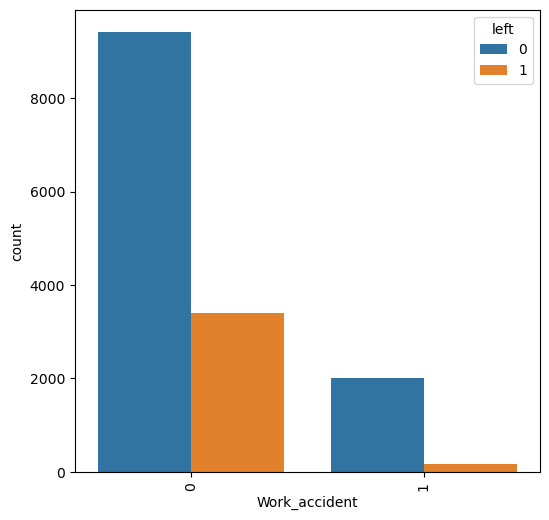

In [910]:
#Work_accident
plt.figure(figsize=(6,6))
sns.barplot(x="Work_accident",y='count',hue="left",data=df4)
plt.xticks(rotation=90)

#### Observation- Work accident is not playing much role in employees decision to leave, employees with zero work accident are leaving the most.

#### 2.2 Draw the distribution plot of:#####      Employee Satisfaction (use column satisfaction_levelurs)

<Axes: xlabel='satisfaction_level', ylabel='Count'>

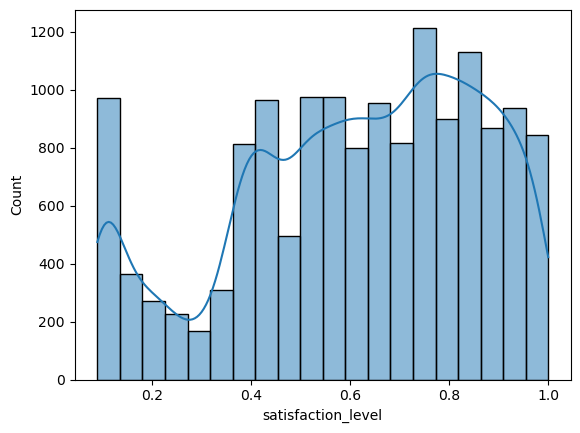

In [914]:
sns.histplot(data = df,x="satisfaction_level", kde = True,bins=20)

#### 2.2 Draw the distribution plot of:
#####  Employee Evaluation (use column last_evaluation)

<Axes: xlabel='last_evaluation', ylabel='Count'>

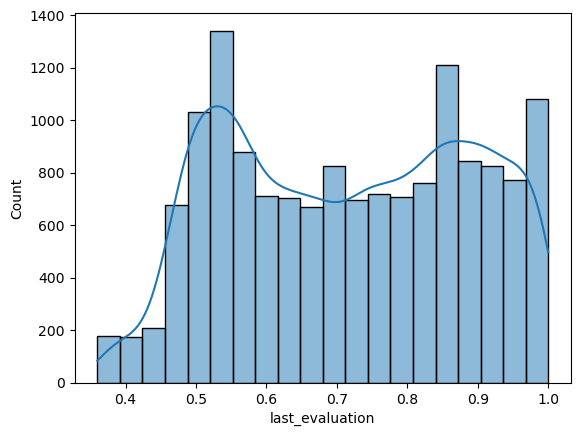

In [917]:
sns.histplot(data = df,x="last_evaluation", kde = True,bins=20)

#### 2.2 Draw the distribution plot of:
#####  Employee Average Monthly Hours (use column average_montly_hours)

<Axes: xlabel='average_montly_hours', ylabel='Count'>

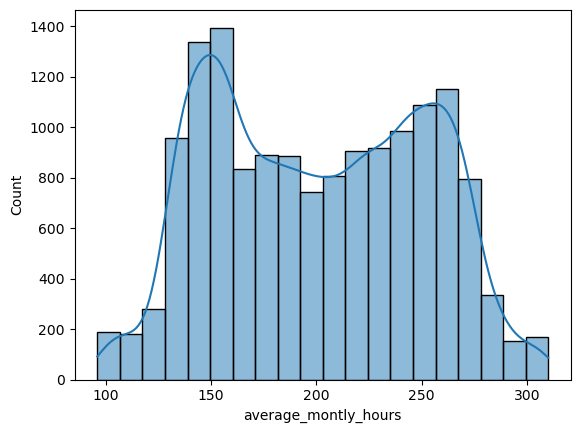

In [920]:
sns.histplot(data = df,x="average_montly_hours", kde = True,bins=20)

#### 2.3 Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

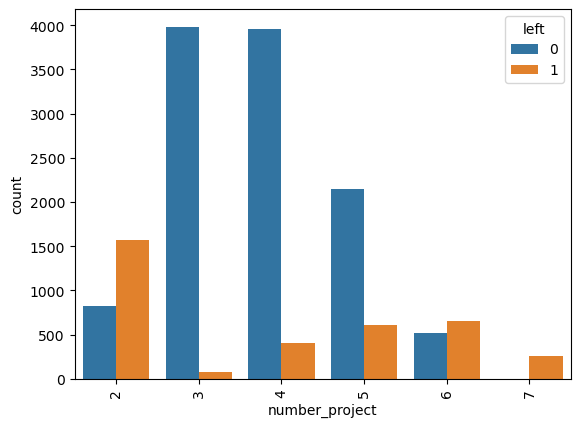

In [923]:
sns.countplot(x="number_project",hue="left",data=df)
plt.xticks(rotation=90)

#### Observation- Employees with number of project = 2 have left the company most.

#### 3. Perform clustering of employees who left based on their satisfaction and##### 3.1 Choose columns satisfaction_level, last_evaluation, and left.n

In [927]:
dfclus = df[["satisfaction_level","last_evaluation","left"]]

In [929]:
dfclus

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


#### 3. Perform clustering of employees who left based on their satisfaction and
##### 3.2 Do K-means clustering of employees who left the company into 3 clusters?

In [932]:
km=dfclus.iloc[:,:].values
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(dfclus)
labelarr = kmeans.fit_predict(km)

In [934]:
label

array([1, 1, 1, ..., 1, 1, 1])

In [936]:
dfclus[label==0].describe()

,satisfaction_level,last_evaluation,left
count,4596.000000,4596.000000,4596.0
mean,0.453814,0.679569,0.0
std,0.152887,0.165613,0.0
min,0.120000,0.360000,0.0
25%,0.340000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


In [938]:
dfclus[label==1].describe()

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


In [940]:
dfclus[label==2].describe()

,satisfaction_level,last_evaluation,left
count,6832.000000,6832.000000,6832.0
mean,0.810095,0.739627,0.0
std,0.109845,0.154931,0.0
min,0.590000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [942]:
km[label==0,1]

array([0.74, 0.69, 0.6 , ..., 0.94, 0.65, 0.73])

#### 3. Perform clustering of employees who left based on their satisfaction and
##### 3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

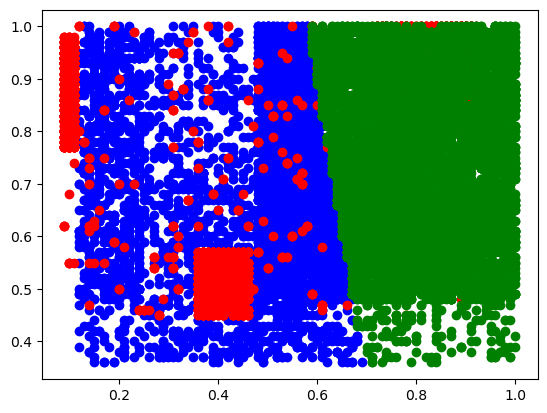

In [945]:
plt.scatter(km[label==0,0],km[label==0,1],color="blue")
plt.scatter(km[label==1,0],km[label==1,1],color="red")
plt.scatter(km[label==2,0],km[label==2,1],color="green")

#### Observation- 
##### The Green cluster denotes people with best satisfaction levels and scored high in the last evaluation.ters.

##### The Blue cluster denotes people with medium satisfaction levels and scored average to high in the last evaluation.

##### The Red cluster denotes people with lower satisfaction levels and scored fairly than the above mentioned clusters.

#### 4. Handle the left Class Imbalance using the SMOTE technique
##### 4.1 Pre-process the data by converting categorical columns to numerical columns by:
##### ■ Separating categorical variables and numeric variables
##### ■ Applying get_dummies() to the categorical variables
##### ■ Combining categorical variables and numeric variables

In [951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [953]:
# Separating categorical variables and numeric variables
df_numerical=df.select_dtypes(include=['int64','float64'])
df_categorical=df.select_dtypes(include=['object'])

Converting the categorical data into numerical using one hot encoding

In [956]:
#Applying get_dummies() to the categorical variables
df_converted = pd.get_dummies(data=df_categorical)

In [958]:
df_converted.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


In [960]:
#Combining categorical variables and numeric variables
dfn = pd.concat([df_numerical, df_converted], axis=1, join="inner")

In [962]:
dfn.shape

(14999, 21)

In [964]:
dfn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


#### 4. Handle the left Class Imbalance using the SMOTE technique
##### 4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [967]:
#Splitting the dataset into training and testing in the ratio of 80:20 with random state = 123.
x =dfn.drop("left",axis=1)
y = dfn["left"]
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [969]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11999, 20)
(3000, 20)
(11999,)
(3000,)


In [971]:
y_train.value_counts()

left
0    9137
1    2862
Name: count, dtype: int64

#### Observation- 
##### Data is highly imbalanced for the training dataset as the record of people who left is very low (2862) in comparision to the record of people who didn't leave (9137).

#### 4. Handle the left Class Imbalance using the SMOTE technique
##### 4.3 Upsample the train dataset using the SMOTE technique from the 
imblearn module.

In [975]:
sm = SMOTE(random_state = 2)
xtrainres, ytrainres = sm.fit_resample(X_train, y_train)

In [977]:
ytrainres.value_counts()

left
0    9137
1    9137
Name: count, dtype: int64

#### 5. Perform 5-fold cross-validation model training and evaluate performance.
##### 5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

In [980]:
# Train a logistic regression model- logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

In [982]:
#apply a 5-fold CV- logistic regression model
print(cross_val_score(logreg, xtrainres, ytrainres, cv=5).mean())

0.805681789422532


In [983]:
logreg.fit(xtrainres,ytrainres)
ypred_LogReg = logreg.predict(X_test)

In [984]:
# plot the classification report.- logistic regression model
print(classification_report(y_test, ypred_LogReg))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



#### 5. Perform 5-fold cross-validation model training and evaluate performance.
##### 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [986]:
# Train a Random Forest Classifier model - Random Forest Classifier model
randm=RandomForestClassifier(max_depth=5)

In [987]:
# apply the 5-fold CV - Random Forest Classifier model
print(cross_val_score(randm, xtrainres, ytrainres, cv=5).mean())

0.9493816944045728


In [988]:
randm.fit(xtrainres,ytrainres)
ypred_RanFor=randm.predict(X_test)

In [989]:
# plot the classification report. - Random Forest Classifier model
print(classification_report(y_test, ypred_RanFor))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2291
           1       0.91      0.92      0.91       709

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000



#### 5. Perform 5-fold cross-validation model training and evaluate performance.
##### 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and 
plot the classification report.

In [991]:
# Train a Gradient Boosting Classifier model - Gradient Boosting Classifier model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [992]:
# apply the 5-fold CV - Gradient Boosting Classifier model
print(cross_val_score(gb, xtrainres, ytrainres, cv=5).mean())

0.9473570107005648


In [993]:
gb.fit(xtrainres, ytrainres)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [994]:
ypred_GraBoo = gb.predict(X_test)

In [995]:
# plot the classification report. - Gradient Boosting Classifier model
print(classification_report(y_test, ypred_GraBoo))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2291
           1       0.84      0.94      0.89       709

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000



#### 6. Identify the best model and justify the evaluation metrics used.
####  6.1. Find the ROC/AUC for each model and plot the ROC curve.

In [997]:
# Find the ROC/AUC for each model - Logistic Regression
roc_auc_score(y_test, ypred_LogReg)

0.7381120949764177

[0.         0.20078568 1.        ]
[0.         0.67700987 1.        ]
[inf  1.  0.]
0.7381120949764177


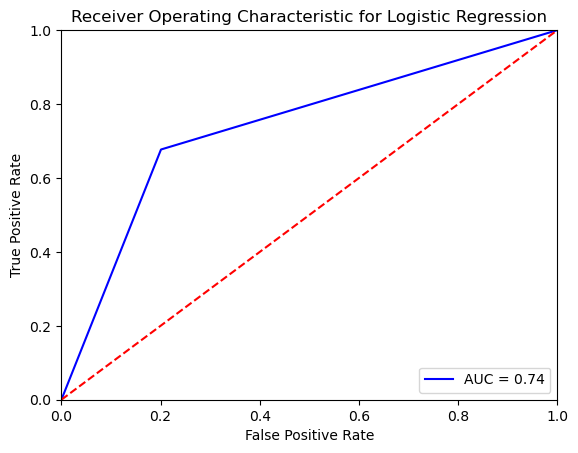

In [998]:
# plot the ROC curve. - Logistic Regression
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred_LogReg)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [999]:
# Find the ROC/AUC for each model - Random Forest
roc_auc_score(y_test, ypred_RanFor)

0.9463722950972068

[0.         0.02968136 1.        ]
[0.         0.92242595 1.        ]
[inf  1.  0.]
0.9463722950972068


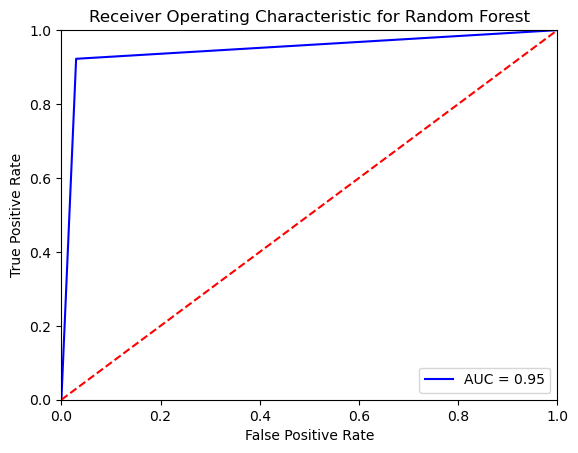

In [1000]:
# plot the ROC curve. - Random Forest
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred_RanFor)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1001]:
# Find the ROC/AUC for each model - Gradient Boosting
roc_auc_score(y_test, ypred_GraBoo)

0.9407157707322269

[0.         0.05368835 1.        ]
[0.         0.93511989 1.        ]
[inf  1.  0.]
0.9407157707322269


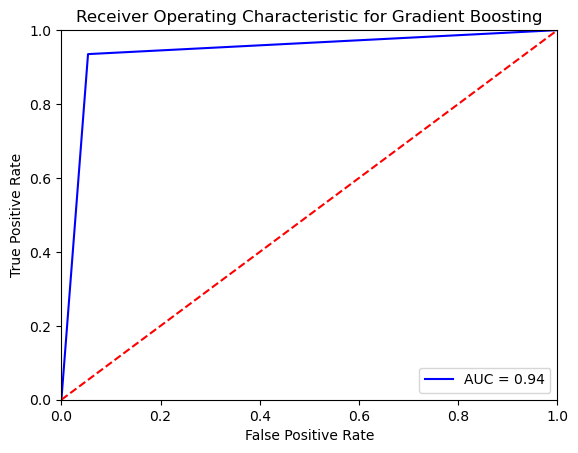

In [1002]:
# plot the ROC curve. - Gradient Boosting
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred_GraBoo)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 6. Identify the best model and justify the evaluation metrics used.
####  6.2. Find the confusion matrix for each of the models.

In [1004]:
#build the confusion matrix - logistic regression model
metrics.confusion_matrix(y_test, ypred_LogReg)

array([[1831,  460],
       [ 229,  480]], dtype=int64)

In [1006]:
#build the confusion matrix - Random Forest Classifier model
metrics.confusion_matrix(y_test, ypred_RanFor)

array([[2223,   68],
       [  55,  654]], dtype=int64)

In [1007]:
#build the confusion matrix - Gradient Boosting Classifier model
metrics.confusion_matrix(y_test, ypred_GraBoo)

array([[2168,  123],
       [  46,  663]], dtype=int64)

#### 6. Identify the best model and justify the evaluation metrics used.
####  6.3. Explain which metric needs to be used from the confusion matrix:
####  Recall or Precision?

#### Observation-
#### Based on the confusion matrix, the false negatives should be low because if an employee who might leave the organisation is misclassified as someone who won't leave then proper strategies to retain that person will not be implemented on him or her. Hence Recall is better metric to be used

#### Since Random Forest shows the highest accuracy with good f1 score, we will conclude that to be our best performing model.

#### 7. Suggest various retention strategies for targeted employees.
####  7.1. Using the best model, predict the probability of employee turnover in the test data

In [1015]:
col = xtrainres.columns
feature_labels = np.array(col)

In [1016]:
importance = randm.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

sales_product_mng-0.01%
sales_marketing-0.02%
sales_accounting-0.02%
sales_IT-0.02%
sales_management-0.02%
sales_RandD-0.02%
sales_hr-0.06%
sales_support-0.11%
promotion_last_5years-0.15%
sales_sales-0.21%
salary_medium-0.28%
sales_technical-0.32%
salary_high-0.74%
salary_low-1.08%
Work_accident-2.45%
last_evaluation-10.07%
average_montly_hours-12.35%
number_project-16.66%
time_spend_company-22.61%
satisfaction_level-32.80%


#### Observation- 
#### The above lists the factors that influences the turnover in the ascending order. It can be identified that the employee turnover is highly influenced by the employee's satisfaction level in the organisation (31.68%). Improvement of work culture within the organiation can be a good way to prevent the employees from leaving the organisation.

#### 7. Suggest various retention strategies for targeted employees.
####  7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
####  ■ Safe Zone (Green) (Score < 20%)
####  ■ Low-Risk Zone (Yellow) (20% < Score < 60%)
####  ■ Medium-Risk Zone (Orange) (60% < Score < 90%)
####  ■ High-Risk Zone (Red) (Score > 90%).

In [1021]:
predict_probability = randm.predict_proba(X_test)

In [1025]:
predict_probability[:,1]

array([0.05021788, 0.13924393, 0.09499363, ..., 0.7071342 , 0.06480545,
       0.13260678])

In [1026]:
zone=[]
prob=[]

for i in predict_probability[:,1]:
  prob.append(i)
  if (i<=0.2):
    zone.append("Safe Zone")    
  elif (i>0.2 and i<=0.6):
    zone.append("Low Risk Zone")
  elif (i>0.6 and i<=0.9):
    zone.append("Medium Risk Zone ")
  else:
    zone.append("High Risk Zone ")

In [1027]:
categories = ["Safe Zone","Low Risk Zone","Medium Risk Zone ","High Risk Zone "]
color = ["Green","Yellow","Orange","Red"]

In [1028]:
colordict = dict(zip(categories, color))

In [1029]:
clr = pd.DataFrame({"zone":zone,"probability":prob})

In [1030]:
clr["zone"].unique()

array(['Safe Zone', 'High Risk Zone ', 'Medium Risk Zone ',
       'Low Risk Zone'], dtype=object)

In [1031]:
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])

In [1032]:
clr.head(10)

,zone,probability,Color
0,Safe Zone,0.050218,Green
1,Safe Zone,0.139244,Green
2,Safe Zone,0.094994,Green
3,Safe Zone,0.086022,Green
4,Safe Zone,0.142470,Green
5,Safe Zone,0.078330,Green
6,High Risk Zone,0.943995,Red
7,Medium Risk Zone,0.743815,Orange
8,Safe Zone,0.148121,Green
9,Safe Zone,0.083620,Green


In [1033]:
color= clr["Color"].tolist()

In [1034]:
c = ["Green","Red","Orange","Yellow"]

C:\Users\vc250024\AppData\Local\Temp\ipykernel_5180\1427609077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(zone,palette=c)


<Axes: xlabel='count'>

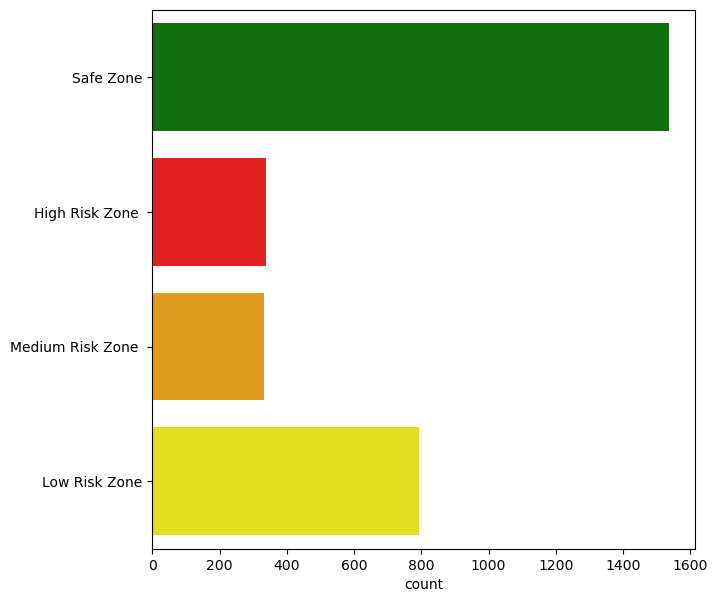

In [1036]:
plt.figure(figsize=(7,7))
sns.countplot(zone,palette=c)